# 공공데이터 분석(부산 도시철도 승하차 인원 분석)

### <div style="text-align: right"> 2019.08.01. by 열심남 </div>

### 개요 : 부산교통공사의 일별,시간대별 승하차 정보를 가지고 도시철도 역별 이용객 수 상위 분석 및 시각화

### 분석전 추정 : 
부산은 1호선 라인이 가장 오래됐으므로 1호선 역들이 가장 많을것이다. 그중에서 서면역, 부산역이 가장 이용객이 많을것이다. 2호선에서는 관광지인 해운대가 가장 많지 않을까?

### 분석목표 : 역별 일 평균 이용객수를 가지고 상위 이용 역을 분석하고 지도에 시각화 해보자

### 사용 원천 데이터 설명

- 부산교통공사  : https://www.humetro.busan.kr/default/main.do

1. 부산교통공사 시간대별 승하차인원 (2018년).csv : https://www.data.go.kr/dataset/3057229/fileData.do
   2018년도 일자별, 시간대별, 역별 ,승차/하차 이용객수 데이터로 저장됨
   
1. 부산교통공사_도시철도역사정보_20190520.csv :  https://www.data.go.kr/dataset/15001002/fileData.do
   역별 주요 정보가 들어있으면, 역사의 위도/경도 정보가 이 파일에 있음

In [1]:
import pandas as pd
#시각화 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
#승하차인원 csv파일 읽기
data= pd.read_csv('./data2/부산교통공사 시간대별 승하차인원 (2018년).csv',engine='python')  #한글파일 csv인 경우 engine옵션 필요

In [3]:
data.head()

,년월일,역번호,역명,구분,1시-2시,2시-3시,3시-4시,4시-5시,5시-6시,6시-7시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
0,20180101,95,다대포해수욕장,승차,0,0,0,12,37,63,...,430,361,398,221,129,110,87,59,12,6
1,20180101,95,다대포해수욕장,하차,12,7,0,1,53,1392,...,286,294,319,182,179,139,134,89,76,48
2,20180101,96,다대포항,승차,1,1,0,4,44,70,...,182,179,165,129,90,63,54,27,11,2
3,20180101,96,다대포항,하차,11,1,0,0,11,62,...,186,193,191,198,155,143,128,115,68,42
4,20180101,97,낫개,승차,1,1,0,9,78,159,...,248,274,250,171,146,61,78,65,22,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81760 entries, 0 to 81759
Data columns (total 28 columns):
년월일        81760 non-null int64
역번호        81760 non-null int64
역명         81760 non-null object
구분         81760 non-null object
1시-2시      81760 non-null int64
2시-3시      81760 non-null int64
3시-4시      81760 non-null int64
4시-5시      81760 non-null int64
5시-6시      81760 non-null int64
6시-7시      81760 non-null int64
7시-8시      81760 non-null int64
8시-9시      81760 non-null int64
9시-10시     81760 non-null int64
10시-11시    81760 non-null int64
11시-12시    81760 non-null int64
12시-13시    81760 non-null int64
13시-14시    81760 non-null int64
14시-15시    81760 non-null int64
15시-16시    81760 non-null int64
16시-17시    81760 non-null int64
17시-18시    81760 non-null int64
18시-19시    81760 non-null int64
19시-20시    81760 non-null int64
20시-21시    81760 non-null int64
21시-22시    81760 non-null int64
22시-23시    81760 non-null int64
23시-24시    81760 non-null int64
24시-01시    81760 non-null

### 1.1. 컬럼명변경

In [5]:
data.columns

Index(['년월일', '역번호', '역명', '구분', '1시-2시', '2시-3시', '3시-4시', '4시-5시', '5시-6시',
       '6시-7시', '7시-8시', '8시-9시', '9시-10시', '10시-11시', '11시-12시', '12시-13시',
       '13시-14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시',
       '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시', '24시-01시'],
      dtype='object')

In [6]:
#컬럼 일괄 변경 
data.columns = ['년월일', '역번호', '역명', '구분', '1시', '2시', '3시', '4시', '5시','6시', '7시', '8시', '9시', '10시', '11시', '12시','13시', '14시', '15시', '16시', '17시', '18시','19시', '20시', '21시', '22시', '23시', '24시']

data.columns

Index(['년월일', '역번호', '역명', '구분', '1시', '2시', '3시', '4시', '5시', '6시', '7시',
       '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시',
       '18시', '19시', '20시', '21시', '22시', '23시', '24시'],
      dtype='object')

### 1.2. 데이터타입변경

In [7]:
#datatype변경 년월일:to_datetime  역번호: astype('str')
data['년월일']=data['년월일'].astype('str')  # int -> str변환후 날짜 변환해야 함
data['년월일']=pd.to_datetime(data['년월일'])
data['역번호']=data['역번호'].astype('str')

In [8]:
data.dtypes

년월일    datetime64[ns]
역번호            object
역명             object
구분             object
1시              int64
2시              int64
3시              int64
4시              int64
5시              int64
6시              int64
7시              int64
8시              int64
9시              int64
10시             int64
11시             int64
12시             int64
13시             int64
14시             int64
15시             int64
16시             int64
17시             int64
18시             int64
19시             int64
20시             int64
21시             int64
22시             int64
23시             int64
24시             int64
dtype: object

In [9]:
data.head()

,년월일,역번호,역명,구분,1시,2시,3시,4시,5시,6시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2018-01-01,95,다대포해수욕장,승차,0,0,0,12,37,63,...,430,361,398,221,129,110,87,59,12,6
1,2018-01-01,95,다대포해수욕장,하차,12,7,0,1,53,1392,...,286,294,319,182,179,139,134,89,76,48
2,2018-01-01,96,다대포항,승차,1,1,0,4,44,70,...,182,179,165,129,90,63,54,27,11,2
3,2018-01-01,96,다대포항,하차,11,1,0,0,11,62,...,186,193,191,198,155,143,128,115,68,42
4,2018-01-01,97,낫개,승차,1,1,0,9,78,159,...,248,274,250,171,146,61,78,65,22,1


### * 데이터 정제 작업

In [10]:
##역명의 양쪽공백 문자 제거 
data['역명'] = data['역명'].str.strip()
##역명의 중간 공백 문자 제거
data['역명'] = data['역명'].str.replace(" ","")

In [11]:
data['역명']

0        다대포해수욕장
1        다대포해수욕장
2           다대포항
3           다대포항
4             낫개
5             낫개
6            신장림
7            신장림
8             장림
9             장림
10            동매
11            동매
12            신평
13            신평
14            하단
15            하단
16            당리
17            당리
18            사하
19            사하
20            괴정
21            괴정
22            대티
23            대티
24           서대신
25           서대신
26           동대신
27           동대신
28            토성
29            토성
          ...   
81730       체육공원
81731       체육공원
81732         대저
81733         대저
81734        4동래
81735        4동래
81736         수안
81737         수안
81738         낙민
81739         낙민
81740        충렬사
81741        충렬사
81742         명장
81743         명장
81744         서동
81745         서동
81746         금사
81747         금사
81748      반여농산물
81749      반여농산물
81750         석대
81751         석대
81752        영산대
81753        영산대
81754       동부산대
81755       동부산대
81756         고촌
81757         

In [12]:
data.head()

,년월일,역번호,역명,구분,1시,2시,3시,4시,5시,6시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2018-01-01,95,다대포해수욕장,승차,0,0,0,12,37,63,...,430,361,398,221,129,110,87,59,12,6
1,2018-01-01,95,다대포해수욕장,하차,12,7,0,1,53,1392,...,286,294,319,182,179,139,134,89,76,48
2,2018-01-01,96,다대포항,승차,1,1,0,4,44,70,...,182,179,165,129,90,63,54,27,11,2
3,2018-01-01,96,다대포항,하차,11,1,0,0,11,62,...,186,193,191,198,155,143,128,115,68,42
4,2018-01-01,97,낫개,승차,1,1,0,9,78,159,...,248,274,250,171,146,61,78,65,22,1


#### 이상 데이터 확인 : 결측치, 역명이나 역번호 오류인건 체크 필요

In [13]:
#결측데이터 확인 : 다행이 없음
data.isnull().sum()

년월일    0
역번호    0
역명     0
구분     0
1시     0
2시     0
3시     0
4시     0
5시     0
6시     0
7시     0
8시     0
9시     0
10시    0
11시    0
12시    0
13시    0
14시    0
15시    0
16시    0
17시    0
18시    0
19시    0
20시    0
21시    0
22시    0
23시    0
24시    0
dtype: int64

In [14]:
#데이터 검증 역별로 데이터건수가 동일한지 체크해보자
#df.groupby(['년월일','역번호','역명'])['합계'].mean()
d_check =pd.DataFrame(data.groupby(['역번호','역명','구분'])['년월일'].count())
d_check=d_check.reset_index()
d_check.head()

,역번호,역명,구분,년월일
0,100,동매,승차,365
1,100,동매,하차,365
2,101,신평,승차,365
3,101,신평,하차,365
4,102,하단,승차,365


In [15]:
#년월일 갯수가 365가 아닌 역 체크해보자 :아래 목록에 나온건은 정제 대상이다.
d_check[d_check['년월일']<365]

,역번호,역명,구분,년월일
38,119,1서면,승차,153
39,119,1서면,하차,153
40,119,서면,승차,212
41,119,서면,하차,212
48,123,1연산,승차,153
49,123,1연산,하차,153
50,123,연산,승차,212
51,123,연산,하차,212
54,125,1동래,승차,153
55,125,1동래,하차,153


#### 역번호가 같은경우 역통합이 필요함 : 
- 서면 -> 1서면 : 119
- 연산 -> 1연산 : 123
- 동래 -> 1동래 : 125
- 서면 -> 2서면 : 219
- 덕천 -> 2덕천 : 233
- 연산 -> 3연산 : 305
- 덕천 -> 3덕천 : 313
- 동래 -> 4동래 : 402

In [16]:
# apply() 함수로 데이터를 변경해볼까?
# 역번호 역명 기준으로 가져온  수정할대상을 가져와서 원하는 역명으로 수정  전체 데이터 작업이라 오래 걸린다.
data['역명'] = data.apply(lambda x : '1서면' if (x.역번호=='119') & (x.역명=='서면') else x.역명  , axis=1 )

In [17]:
data['역명'] = data.apply(lambda x : '1연산' if (x.역번호=='123') & (x.역명=='연산') else x.역명  , axis=1 )

In [18]:
data['역명'] = data.apply(lambda x : '1동래' if (x.역번호=='125') & (x.역명=='동래') else x.역명  , axis=1 )

In [19]:
data['역명'] = data.apply(lambda x : '2서면' if (x.역번호=='219') & (x.역명=='서면') else x.역명  , axis=1 )

In [20]:
data['역명'] = data.apply(lambda x : '2덕천' if (x.역번호=='233') & (x.역명=='덕천') else x.역명  , axis=1 )

In [21]:
data['역명'] = data.apply(lambda x : '3연산' if (x.역번호=='305') & (x.역명=='연산') else x.역명  , axis=1 )

In [22]:
data['역명'] = data.apply(lambda x : '3덕천' if (x.역번호=='313') & (x.역명=='덕천') else x.역명  , axis=1 )

In [23]:
data['역명'] = data.apply(lambda x : '4동래' if (x.역번호=='402') & (x.역명=='동래') else x.역명  , axis=1 )

#### 역번호 오류 추정 수안역
- 7 -> 403  : 수안역

In [24]:
#역번호 오류 추정 수안역
#7 -> 403  : 수안역
data['역번호'] = data.apply(lambda x : '403' if (x.역번호=='7') & (x.역명=='수안') else x.역번호  , axis=1 )

In [25]:
#데이터 변경후 재검증 
d_check = pd.DataFrame(data.groupby(['역번호','역명','구분'])['년월일'].count())
d_check = d_check.reset_index()
#년월일 갯수가 365가 아닌 역 체크해보자
d_check[d_check['년월일']<365]

,역번호,역명,구분,년월일


In [26]:
data.head()

,년월일,역번호,역명,구분,1시,2시,3시,4시,5시,6시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2018-01-01,95,다대포해수욕장,승차,0,0,0,12,37,63,...,430,361,398,221,129,110,87,59,12,6
1,2018-01-01,95,다대포해수욕장,하차,12,7,0,1,53,1392,...,286,294,319,182,179,139,134,89,76,48
2,2018-01-01,96,다대포항,승차,1,1,0,4,44,70,...,182,179,165,129,90,63,54,27,11,2
3,2018-01-01,96,다대포항,하차,11,1,0,0,11,62,...,186,193,191,198,155,143,128,115,68,42
4,2018-01-01,97,낫개,승차,1,1,0,9,78,159,...,248,274,250,171,146,61,78,65,22,1


In [27]:
#정제된 데이터 파일로 저장 : csv로 빠르게 인덱스 없이! 한글깨짐 현상 때문에 encoding필요 
data.to_csv('./data2/부산교통공사 시간대별 승하차인원 (2018년)_정제.csv',encoding='ms949',index=False)

### 1.3. 일별 승하차 데이터 합계 구하기

In [28]:
#일자별 행합계 구하기(승/하차는 구분되어 있음)
data['합계']= data.sum(axis=1)
data.head()

,년월일,역번호,역명,구분,1시,2시,3시,4시,5시,6시,...,16시,17시,18시,19시,20시,21시,22시,23시,24시,합계
0,2018-01-01,95,다대포해수욕장,승차,0,0,0,12,37,63,...,361,398,221,129,110,87,59,12,6,6369
1,2018-01-01,95,다대포해수욕장,하차,12,7,0,1,53,1392,...,294,319,182,179,139,134,89,76,48,5953
2,2018-01-01,96,다대포항,승차,1,1,0,4,44,70,...,179,165,129,90,63,54,27,11,2,2277
3,2018-01-01,96,다대포항,하차,11,1,0,0,11,62,...,193,191,198,155,143,128,115,68,42,2468
4,2018-01-01,97,낫개,승차,1,1,0,9,78,159,...,274,250,171,146,61,78,65,22,1,3361


### 1.4. 필요한 정보로 데이터프레임 구성하기

In [29]:
#시간대별 분석이 아니므로 일 합계 만 가져와서 처리하자 
df=data[['년월일','역번호','역명','구분','합계']]
df.head()

,년월일,역번호,역명,구분,합계
0,2018-01-01,95,다대포해수욕장,승차,6369
1,2018-01-01,95,다대포해수욕장,하차,5953
2,2018-01-01,96,다대포항,승차,2277
3,2018-01-01,96,다대포항,하차,2468
4,2018-01-01,97,낫개,승차,3361


### 1.5.  승/하차 평균으로 1일 이용객 합계 만들기

In [30]:
#일자로 groupby 승하차 합계의 평균을 1일 이용객수로 산정한다.
dfg=df.groupby(['년월일','역번호','역명'])['합계'].mean()

In [31]:
dfg.head(10)

년월일         역번호  역명 
2018-01-01  100  동매      1972.5
            101  신평      3783.5
            102  하단     11380.5
            103  당리      3385.0
            104  사하      2593.5
            105  괴정      5603.5
            106  대티      2007.5
            107  서대신     1422.5
            108  동대신     3305.0
            109  토성      4327.0
Name: 합계, dtype: float64

In [32]:
#seriese 를 데이터프레임으로 재처리
dfg2=pd.DataFrame(dfg)
dfg2.head()

합계
년월일        역번호 역명         
2018-01-01 100 동매   1972.5
           101 신평   3783.5
           102 하단  11380.5
           103 당리   3385.0
           104 사하   2593.5

In [33]:
#index reset
dfg2 = dfg2.reset_index()
dfg2.head()

,년월일,역번호,역명,합계
0,2018-01-01,100,동매,1972.5
1,2018-01-01,101,신평,3783.5
2,2018-01-01,102,하단,11380.5
3,2018-01-01,103,당리,3385.0
4,2018-01-01,104,사하,2593.5


In [34]:
#컬럼명 변경  합계 -> 이용객수
dfg2.columns
dfg2.columns = ['년월일', '역번호', '역명', '이용객수']
dfg2

,년월일,역번호,역명,이용객수
0,2018-01-01,100,동매,1972.5
1,2018-01-01,101,신평,3783.5
2,2018-01-01,102,하단,11380.5
3,2018-01-01,103,당리,3385.0
4,2018-01-01,104,사하,2593.5
5,2018-01-01,105,괴정,5603.5
6,2018-01-01,106,대티,2007.5
7,2018-01-01,107,서대신,1422.5
8,2018-01-01,108,동대신,3305.0
9,2018-01-01,109,토성,4327.0


In [35]:
##두번째 분석을 위해서 엑셀파일로 데이터 저장
dfg2.to_excel('./data2/부산일자별도시철도이용객수.xlsx')

In [36]:
## 2018년 전체 일자별 승하차 평균으로 새로운 데이터 생성
#round(dfg2.groupby(['역번호','역명'])['합계'].mean())
dfg3=pd.DataFrame(round(dfg2.groupby(['역번호','역명'])['이용객수'].mean()))
dfg3

,,이용객수
역번호,역명,
100,동매,3506.0
101,신평,6768.0
102,하단,19495.0
103,당리,6979.0
104,사하,4510.0
105,괴정,10145.0
106,대티,3951.0
107,서대신,2878.0
108,동대신,6515.0


In [37]:
#이용객수로 정렬
dfg3=dfg3.sort_values(by='이용객수',ascending=False)
dfg3.head(20)

,,이용객수
역번호,역명,
119,1서면,42398.0
219,2서면,29339.0
227,사상,24501.0
111,남포,23268.0
113,부산역,22950.0
123,1연산,21432.0
110,자갈치,21010.0
206,센텀시티,20863.0
212,경성대부경대,19520.0


### 1.6 역사정보에서 위도/경도 데이터 가져와서 병합하기

In [38]:
#승하차인원 csv파일 읽기
dinfo= pd.read_csv('./data2/부산교통공사_도시철도역사정보_20190520.csv',engine='python')  #한글파일 csv인 경우 engin옵션 필요

In [39]:
dinfo.head()

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
0,95,다대포해수욕장,S2601,부산도시철도 1호선,Dadaepo Beach,多大浦海水浴場,일반역,NaN,NaN,35.089951,128.973971,부산교통공사,부산광역시 사하구 다대로 지하 692,051-678-6195,2019-05-20
1,96,다대포항역,S2601,부산도시철도 1호선,Dadaepo Harbor,多大浦港,일반역,NaN,NaN,35.081631,128.977636,부산교통공사,부산광역시 사하구 다대로 지하 548,051-678-6196,2019-05-20
2,97,낫개역,S2601,부산도시철도 1호선,Natgae,羅 浦,일반역,NaN,NaN,35.074433,128.977041,부산교통공사,부산광역시 사하구 다대로 지하 422,051-678-6197,2019-05-20
3,98,신장림역,S2601,부산도시철도 1호선,Sinjangnim,新長林,일반역,NaN,NaN,35.065265,128.979873,부산교통공사,부산광역시 사하구 다대로 지하 310,051-678-6198,2019-05-20
4,99,장림역,S2601,부산도시철도 1호선,Jangnim,長林,일반역,NaN,NaN,35.057419,128.971279,부산교통공사,부산광역시 사하구 다대로 지하 230,051-618-6199,2019-05-20


### 이상데이터 정제

In [40]:
#중동역이 지도에 표시가 안된다. 확인해보자
dinfo[dinfo['역사명']=='중동역']

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
41,2020,중동역,S2602,부산도시철도 2호선,Jung-dong,中洞,일반역,NaN,NaN,35.1667,129.168604,부산교통공사,부산광역시 해운대구 해운대로 지하 730,051-678-6202,2019-05-20


In [41]:
dinfo[40:43]

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
40,201,장산역,S2602,부산도시철도 2호선,Jangsan,山,일반역,NaN,NaN,35.169914,129.176986,부산교통공사,부산광역시 해운대구 해운대로 지하 820,051-678-6201,2019-05-20
41,2020,중동역,S2602,부산도시철도 2호선,Jung-dong,中洞,일반역,NaN,NaN,35.166700,129.168604,부산교통공사,부산광역시 해운대구 해운대로 지하 730,051-678-6202,2019-05-20
42,203,해운대역,S2602,부산도시철도 2호선,Haeundae,海雲臺,일반역,NaN,NaN,35.163672,129.158908,부산교통공사,부산광역시 해운대구 해운대로 지하 626,051-678-6203,2019-05-20


In [42]:
#역번호가 3자리대가 아닌 4자리이다. 데이터 전후 추이를 보아 하니 2020 -> 202로 변경이 필요하다
dinfo[dinfo['역번호']== 2020]

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
41,2020,중동역,S2602,부산도시철도 2호선,Jung-dong,中洞,일반역,NaN,NaN,35.1667,129.168604,부산교통공사,부산광역시 해운대구 해운대로 지하 730,051-678-6202,2019-05-20


In [43]:
dinfo.loc[41,'역번호'] = '202'

In [44]:
dinfo[40:43]

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
40,201,장산역,S2602,부산도시철도 2호선,Jangsan,山,일반역,NaN,NaN,35.169914,129.176986,부산교통공사,부산광역시 해운대구 해운대로 지하 820,051-678-6201,2019-05-20
41,202,중동역,S2602,부산도시철도 2호선,Jung-dong,中洞,일반역,NaN,NaN,35.166700,129.168604,부산교통공사,부산광역시 해운대구 해운대로 지하 730,051-678-6202,2019-05-20
42,203,해운대역,S2602,부산도시철도 2호선,Haeundae,海雲臺,일반역,NaN,NaN,35.163672,129.158908,부산교통공사,부산광역시 해운대구 해운대로 지하 626,051-678-6203,2019-05-20


In [45]:
#정제된 데이터 파일로 저장 : csv로 빠르게 인덱스 없이! 한글깨짐 현상 때문에 encoding필요 
dinfo.to_csv('./data2/부산교통공사_도시철도역사정보_20190520_정제.csv',encoding='ms949',index=False)

In [46]:
#역사정보에서 역위도와 역경도정보만 가져오기
dinfo2=dinfo[['역번호','역위도','역경도']]
dinfo2

,역번호,역위도,역경도
0,95,35.089951,128.973971
1,96,35.081631,128.977636
2,97,35.074433,128.977041
3,98,35.065265,128.979873
4,99,35.057419,128.971279
5,100,35.048621,128.965908
6,101,35.095179,128.960564
7,102,35.106180,128.966803
8,103,35.103532,128.973846
9,104,35.099847,128.983100


In [47]:
dfg3

,,이용객수
역번호,역명,
119,1서면,42398.0
219,2서면,29339.0
227,사상,24501.0
111,남포,23268.0
113,부산역,22950.0
123,1연산,21432.0
110,자갈치,21010.0
206,센텀시티,20863.0
212,경성대부경대,19520.0


In [48]:
dfg3 = dfg3.reset_index()
dfg3.head()

,역번호,역명,이용객수
0,119,1서면,42398.0
1,219,2서면,29339.0
2,227,사상,24501.0
3,111,남포,23268.0
4,113,부산역,22950.0


In [49]:
dfg3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
역번호     112 non-null object
역명      112 non-null object
이용객수    112 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


In [50]:
## merge할때 해당 역번호가 object타입임에도 잘 안먹힐때 데이터 타입을 다시 적용 함
dinfo2['역번호']=dinfo2['역번호'].astype('str')
dinfo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
역번호    114 non-null object
역위도    114 non-null float64
역경도    114 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.8+ KB


C:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### 역사 위/경도 정보 병합파일 생성  : df_m

In [51]:
dinfo2

,역번호,역위도,역경도
0,95,35.089951,128.973971
1,96,35.081631,128.977636
2,97,35.074433,128.977041
3,98,35.065265,128.979873
4,99,35.057419,128.971279
5,100,35.048621,128.965908
6,101,35.095179,128.960564
7,102,35.106180,128.966803
8,103,35.103532,128.973846
9,104,35.099847,128.983100


In [52]:
dfg3

,역번호,역명,이용객수
0,119,1서면,42398.0
1,219,2서면,29339.0
2,227,사상,24501.0
3,111,남포,23268.0
4,113,부산역,22950.0
5,123,1연산,21432.0
6,110,자갈치,21010.0
7,206,센텀시티,20863.0
8,212,경성대부경대,19520.0
9,102,하단,19495.0


In [53]:
#역정보와 이용객수를 merge하기 
df_m = pd.merge(dfg3,dinfo2,how='inner')
#df_m = pd.merge(dfg3,dinfo2,how='outer')
df_m

,역번호,역명,이용객수,역위도,역경도
0,119,1서면,42398.0,35.158282,129.059556
1,219,2서면,29339.0,35.157740,129.059084
2,227,사상,24501.0,35.162361,128.984621
3,111,남포,23268.0,35.097953,129.034869
4,113,부산역,22950.0,35.115224,129.039700
5,123,1연산,21432.0,35.186168,129.081534
6,110,자갈치,21010.0,35.097372,129.026670
7,206,센텀시티,20863.0,35.168827,129.131745
8,212,경성대부경대,19520.0,35.137585,129.100548
9,102,하단,19495.0,35.106180,128.966803


In [54]:
#df.to_excel['./data2/부산일평균도시철도이용객수']
df_m.head()

,역번호,역명,이용객수,역위도,역경도
0,119,1서면,42398.0,35.158282,129.059556
1,219,2서면,29339.0,35.157740,129.059084
2,227,사상,24501.0,35.162361,128.984621
3,111,남포,23268.0,35.097953,129.034869
4,113,부산역,22950.0,35.115224,129.039700


### 데이터 시각화 분석

In [55]:
#상위 30개를 새로운 데이터 프레임으로 저장
dfg4 = dfg3.head(30)
dfg4

,역번호,역명,이용객수
0,119,1서면,42398.0
1,219,2서면,29339.0
2,227,사상,24501.0
3,111,남포,23268.0
4,113,부산역,22950.0
5,123,1연산,21432.0
6,110,자갈치,21010.0
7,206,센텀시티,20863.0
8,212,경성대부경대,19520.0
9,102,하단,19495.0


In [56]:
#역번호 불필요해서 역명, 이용객수로 재지정
#dfg4=dfg4[['역명','이용객수']]

#시각화 x축을 위해  역명을 인덱스로 지정
dfg4 = dfg4.set_index('역명')
dfg4

,역번호,이용객수
역명,,
1서면,119,42398.0
2서면,219,29339.0
사상,227,24501.0
남포,111,23268.0
부산역,113,22950.0
1연산,123,21432.0
자갈치,110,21010.0
센텀시티,206,20863.0
경성대부경대,212,19520.0


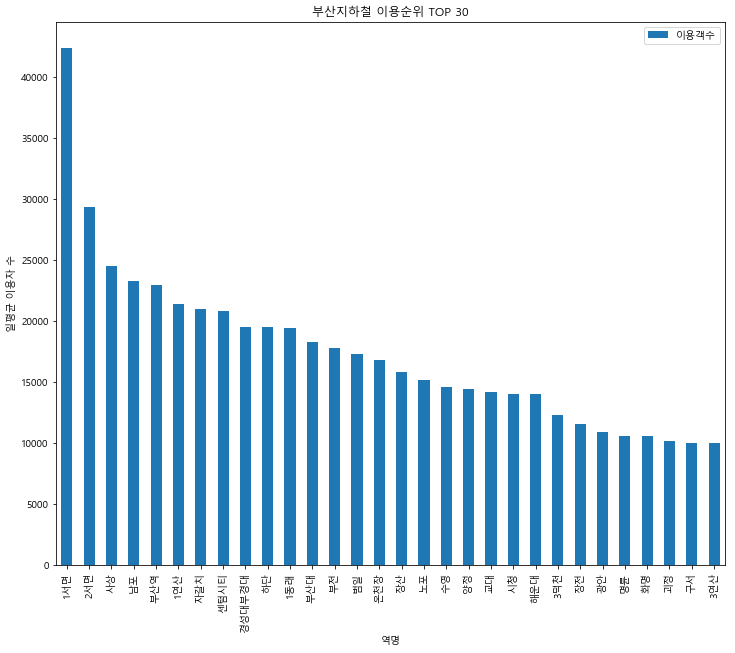

In [57]:
#시각화 
dfg4.plot(kind='bar',figsize=(12,10))
plt.title("부산지하철 이용순위 TOP 30")
plt.ylabel("일평균 이용자 수")
plt.show()

In [58]:
#하위 30개를 새로운 데이터 프레임으로 저장
dfg5 = dfg3.tail(30)
dfg5 = dfg5.set_index('역명')
dfg5

,역번호,이용객수
역명,,
다대포항,96,3657.0
가야,221,3529.0
동매,100,3506.0
구명,232,3494.0
민락,207,3489.0
충렬사,405,3476.0
남양산,242,3467.0
영산대,411,3425.0
물만골,304,3264.0


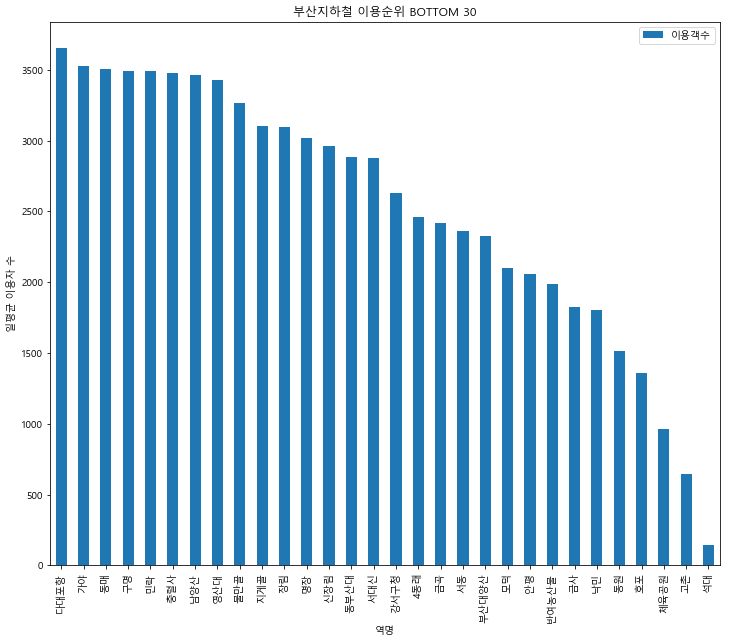

In [59]:
#시각화 
dfg5.plot(kind='bar',figsize=(12,10))
plt.title("부산지하철 이용순위 BOTTOM 30")
plt.ylabel("일평균 이용자 수")
plt.show()

In [60]:
#상위 30개를 새로운 데이터 프레임으로 저장
dfm_top=df_m.head(30)
dfm_top

,역번호,역명,이용객수,역위도,역경도
0,119,1서면,42398.0,35.158282,129.059556
1,219,2서면,29339.0,35.157740,129.059084
2,227,사상,24501.0,35.162361,128.984621
3,111,남포,23268.0,35.097953,129.034869
4,113,부산역,22950.0,35.115224,129.039700
5,123,1연산,21432.0,35.186168,129.081534
6,110,자갈치,21010.0,35.097372,129.026670
7,206,센텀시티,20863.0,35.168827,129.131745
8,212,경성대부경대,19520.0,35.137585,129.100548
9,102,하단,19495.0,35.106180,128.966803


In [61]:
dfm_top.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')

In [62]:
dfm_top[['이용객수']]

,이용객수
0,42398.0
1,29339.0
2,24501.0
3,23268.0
4,22950.0
5,21432.0
6,21010.0
7,20863.0
8,19520.0
9,19495.0


### 이용객수 TOP 30 지도에 시각화 하기

In [63]:
#지도 시각화 
import folium
map_osm = folium.Map(location=[35.166804,129.083479], zoom_start=12)   # 지도 초기 로딩위치


In [64]:
#지도로 상위 이용객 30개 역 표시
for item in dfm_top.index:
    lat = dfm_top.loc[item,'역위도']
    long = dfm_top.loc[item,'역경도']
    #item = item.strip()
    folium.CircleMarker([lat,long],  #위도/경도
                        radius=dfm_top.loc[item,'이용객수']/1500,
                        popup=dfm_top.loc[item,'역명'],
                        color ='blue',
                        fill = True).add_to(map_osm)
map_osm

### 이용객수 Bottom 30 지도에 시각화 하기

In [65]:
#하위 30개를 새로운 데이터 프레임으로 저장
dfm_bottom=df_m.tail(30)
dfm_bottom

,역번호,역명,이용객수,역위도,역경도
82,96,다대포항,3657.0,35.081631,128.977636
83,221,가야,3529.0,35.155883,129.042817
84,100,동매,3506.0,35.048621,128.965908
85,232,구명,3494.0,35.202520,128.999322
86,207,민락,3489.0,35.167228,129.121909
87,405,충렬사,3476.0,35.199859,129.097636
88,242,남양산,3467.0,35.325359,129.019457
89,411,영산대,3425.0,35.225777,129.146149
90,304,물만골,3264.0,35.176808,129.085748
91,215,지게골,3101.0,35.135574,129.074365


In [66]:
#지도 시각화 
import folium
map_osm = folium.Map(location=[35.166804,129.083479], zoom_start=12)   # 지도 초기 로딩위치
#지도로 하위 이용객 30개 역 표시
for item in dfm_bottom.index:
    lat = dfm_bottom.loc[item,'역위도']
    long = dfm_bottom.loc[item,'역경도']
    #item = item.strip()
    folium.CircleMarker([lat,long],  #위도/경도
                        radius=dfm_bottom.loc[item,'이용객수']/500,
                        popup=dfm_bottom.loc[item,'역명'],
                        color ='red',
                        fill = True).add_to(map_osm)
map_osm

In [68]:
#지도 시각화 
import folium
map_osm = folium.Map(location=[35.166804,129.083479], zoom_start=12)   # 지도 초기 로딩위치
#지도로 상위 이용객 30개 역 표시
for item in dfm_top.index:
    lat = dfm_top.loc[item,'역위도']
    long = dfm_top.loc[item,'역경도']
    #item = item.strip()
    folium.CircleMarker([lat,long],  #위도/경도
                        radius=dfm_top.loc[item,'이용객수']/1500,
                        popup=dfm_top.loc[item,'역명'],
                        color ='blue',
                        fill = True).add_to(map_osm)
    
#지도로 하위 이용객 30개 역 표시
for item in dfm_bottom.index:
    lat = dfm_bottom.loc[item,'역위도']
    long = dfm_bottom.loc[item,'역경도']
    #item = item.strip()
    folium.CircleMarker([lat,long],  #위도/경도
                        radius=dfm_bottom.loc[item,'이용객수']/500,
                        popup=dfm_bottom.loc[item,'역명'],
                        color ='red',
                        fill = True).add_to(map_osm)
map_osm

### 전체 역별 이용객수 시각화

In [69]:
df_m.tail()

,역번호,역명,이용객수,역위도,역경도
107,237,동원,1511.0,35.258656,129.012392
108,239,호포,1360.0,35.280406,129.017097
109,316,체육공원,962.0,35.212577,128.969651
110,413,고촌,646.0,35.236031,129.160444
111,410,석대,141.0,35.218112,129.137179


In [70]:
#지도 시각화 
import folium
map_osm = folium.Map(location=[35.166804,129.083479], zoom_start=11)   # 지도 초기 로딩위치


In [71]:
#지도
for item in df_m.index:
    lat = df_m.loc[item,'역위도']
    long = df_m.loc[item,'역경도']
    #item = item.strip()
    folium.CircleMarker([lat,long],  #위도/경도
                        radius=df_m.loc[item,'이용객수']/1300,
                        popup=df_m.loc[item,'이용객수'],
                        color ='green',
                        fill = True).add_to(map_osm)
map_osm

### 분석결과 

- 예상대로 1호선의 주요역들이 이용객수가 많았으며 2호선의 경우 해운대가 아닌 사상역과 센텀시티,경성대부경대역이 이용객수가 많았으며 해운대의 경우 이용객수 기준으로 21위였다.
- 1일 이용객수가 1만명은 되어야 상위 30위건에 들수 있다.
- 전통적인 관광지인 구도심의 남포, 자갈치, 부산역이 TOP 10안에 들어있으며, 서면이외 전통적인 일자리 밀접지역인 연산역도 이용객수가 많았다
- 하단역의 이용객수가 많은것에 대한 분석이 필요해보인다.
- 부산의 경우 서울에 비해 전철의존도가 상대적으로 낮고 버스나 자가용 이용비율이 높아 보인다.(추가분석 필요)